# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
df['site'] = df['site'].str.lower().str.replace(r"site|_", " ", regex=True).str.strip()
mean_age = df.groupby('site')['age'].mean()
mean_bmi = df.groupby('site')['bmi'].mean()
mean_sbp = df.groupby('site')['systolic_bp'].mean()
df_site_summary = pd.DataFrame({
    'mean_age': mean_age,
    'mean_bmi': mean_bmi,
    'mean_systolic_bp': mean_sbp
}).reset_index()
print(df_site_summary)

  site   mean_age   mean_bmi  mean_systolic_bp
0    a  56.364005  25.875183        117.354284
1    b  62.401957  25.706681        117.130675
2    c  57.312108  25.789583        117.978359
3    d  63.491006  25.565682        117.943662
4    e  57.064897  25.476502        117.503080


In [3]:
# TODO: Count by intervention group
df['intervention_group'] = df['intervention_group'].str.lower().str.replace("contrl", "control").str.replace(r"treatment|treatmen", " ", regex=True).str.strip()
intervention_counts = df.groupby('intervention_group').size().reset_index(name='counts')
print(intervention_counts)


  intervention_group  counts
0                  a    3321
1                  b    3342
2            control    3337


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
site_summary = summarize_by_group(df, group_col='site', agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'})
print(site_summary)

            age                    bmi
           mean         std       mean
site                                  
a     56.364005  162.536292  25.875183
b     62.401957  139.050180  25.706681
c     57.312108  157.941868  25.789583
d     63.491006  136.140058  25.565682
e     57.064897  157.697644  25.476502


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
site_summary2 = summarize_by_group(df, group_col='site', agg_dict={'age': ['mean', 'std', 'min', 'max'], 'bmi': ['mean', 'std'], 'systolic_bp': ['mean', 'median']})
display(site_summary)

age                    bmi
           mean         std       mean
site                                  
a     56.364005  162.536292  25.875183
b     62.401957  139.050180  25.706681
c     57.312108  157.941868  25.789583
d     63.491006  136.140058  25.565682
e     57.064897  157.697644  25.476502

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons

# outcome_cvd analysis by intervention group
df['outcome_cvd'] = df['outcome_cvd'].str.lower().str.strip()
print(df['outcome_cvd'].unique())
df["outcome_cvd"] = df["outcome_cvd"].replace({"yes": 1, "no": 0})
df['outcome_cvd'] = pd.to_numeric(df['outcome_cvd'], errors='coerce')
outcome_by_intervention = df.groupby('intervention_group')['outcome_cvd'].mean()
print("outcome_by_intervention:\n", outcome_by_intervention)

# adherence_pct analysis by intervention group
adherence_by_intervention = df.groupby('intervention_group')['adherence_pct'].mean()
print("adherence by intervention:\n", adherence_by_intervention)

# cross tabulation of intervention group vs dropout status
table = df.groupby('intervention_group')['dropout'].value_counts().unstack()
print("Crosstab of intervention group vs dropout status:\n")
display(table)

['no' 'yes']
outcome_by_intervention:
 intervention_group
a          0.319482
b          0.333633
control    0.336530
Name: outcome_cvd, dtype: float64
adherence by intervention:
 intervention_group
a          60.210173
b          61.009404
control    60.621688
Name: adherence_pct, dtype: float64
Crosstab of intervention group vs dropout status:



/var/folders/mh/sw2lkzcs6t584_k0k6jc4lyc0000gn/T/ipykernel_34796/458828082.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["outcome_cvd"] = df["outcome_cvd"].replace({"yes": 1, "no": 0})


dropout,No,Yes
intervention_group,,
a,2831,490
b,2871,471
control,2831,506


<class 'pandas.core.frame.DataFrame'>


<Figure size 1000x600 with 0 Axes>

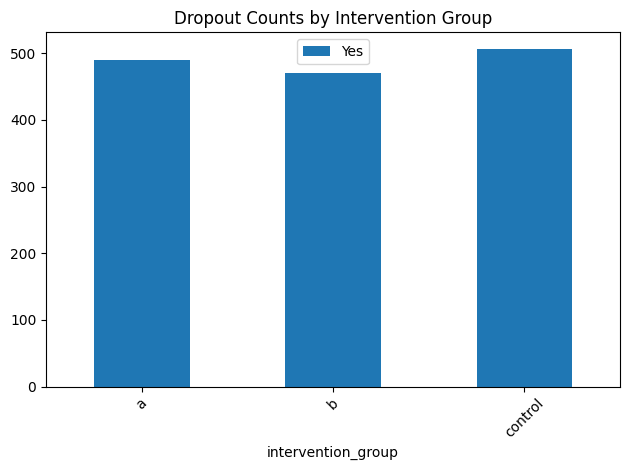

In [7]:
# TODO: Visualization
print(type(table))

plot_df = table.reset_index()
plot_group_comparison(plot_df, x_col='intervention_group', y_col='Yes', title='Dropout Counts by Intervention Group')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [9]:
# TODO: Save summary outputs
df_site_summary.to_csv('output/q7_site_summary.csv', index=False)
table.to_csv('output/q7_intervention_dropout_crosstab.csv', index=True)


report = """**Key Findings:**
1. 
Based on these results there are no major skewedness in the data. 
means and medians align. there don't seem to be very large outliers in the different groupings
2. 
we observed that the dropout rate and intervention adherence was consistent 
amongst the different treatment groups, which eliminates bias caused by treatment assignments.
3. 
the cardiovascular disease outcome of the control group in comparison to two 
interventions didn't have a significant difference
"""
with open('output/q7_key_findings.txt', 'w') as f:
    f.write(report)


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. 
Based on these results there are no major skewedness in the data. means and medians align. there don't seem to be very large outliers in the different groupings
2. 
we observed that the dropout rate and intervention adherence was consistent amongst the different treatment groups, which eliminates bias caused by treatment assignments.
3. 
the cardiovascular disease outcome of the control group in comparison to two interventions didn't have a significant difference